In [1]:
#RMSE will be the evaulation metric
#The Baseline is the Mean revenue for all the Films

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### importing the data

In [55]:
df= pd.read_csv('train.csv')

In [56]:
df.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [57]:
df=pd.DataFrame(df)

In [58]:
#Cleaning the data set, dropping irrelevant columns for Training Data

In [68]:
train=df.drop(columns=['belongs_to_collection', 'genres', 'poster_path', 'homepage', 'imdb_id', 'original_title', 'overview', 'status', 'Keywords', 'tagline', 'cast', 'crew', 'production_companies', 'production_countries', 'spoken_languages'])

In [84]:
train= train.dropna()
train.isnull().sum()

id                   0
budget               0
original_language    0
popularity           0
release_date         0
runtime              0
title                0
revenue              0
dtype: int64

In [69]:
#Test data set
test = pd.read_csv('test.csv')

id                   0
budget               0
original_language    0
popularity           0
release_date         0
runtime              2
title                0
revenue              0
dtype: int64

In [70]:
test= pd.DataFrame(test)

In [71]:
test=test.drop(columns=['belongs_to_collection', 'genres', 'poster_path', 'homepage', 'imdb_id', 'original_title', 'overview', 'status', 'Keywords', 'tagline', 'cast', 'crew', 'production_companies', 'production_countries', 'spoken_languages'])

Will Put the Test Data aside and work exclusively with train data, until the end to project the revenue

##### Visualization and Exploration

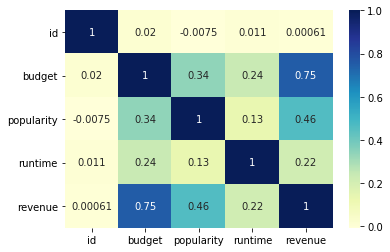

In [72]:
correlation = train.corr() #corr() method of pandas library calculates correlation between columns of dataframe
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

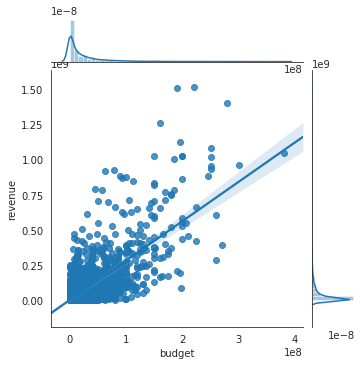

In [73]:
with sns.axes_style('white'):
    j = sns.jointplot("budget", "revenue", data=train, kind='reg', height=5);
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


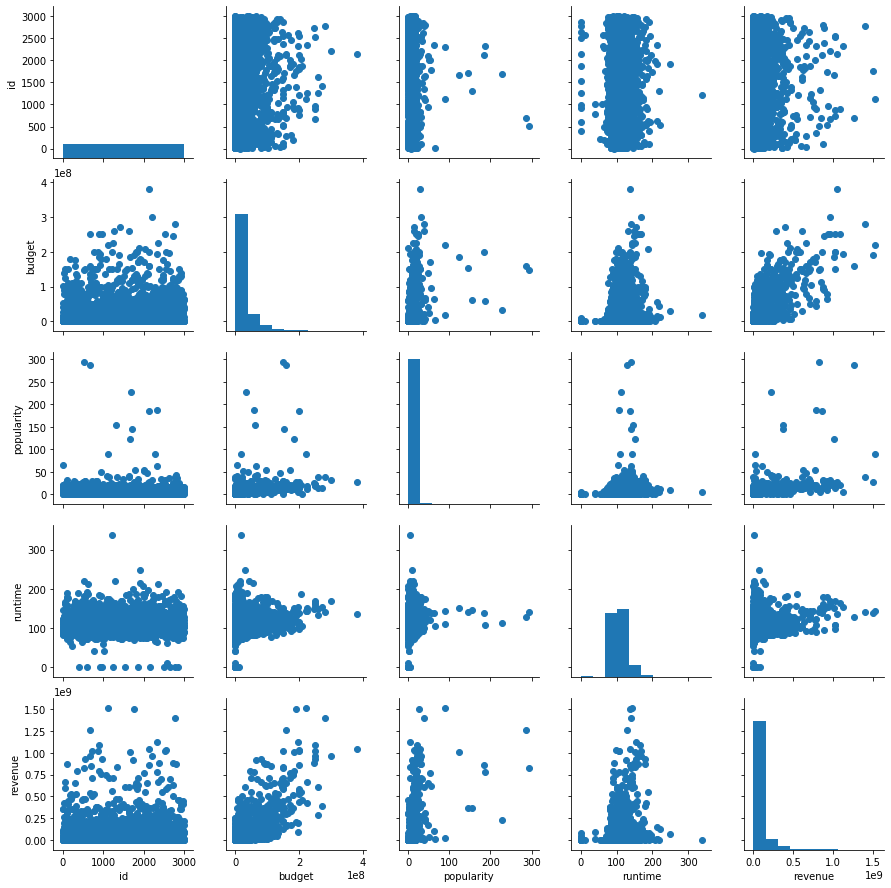

In [74]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [75]:
#Looking for correlations
corr_matrix= train.corr()

In [76]:
#looking at each attribute's correlation
corr_matrix['revenue'].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

#### For MVP Use Budget to predict Revenue


In [85]:
#training / test split
X= train[['budget', 'runtime']]
y= train['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

X_train.head()

,budget,runtime
618,4500000,90.0
1704,42000000,100.0
2441,3000000,95.0
1309,61000000,145.0
2257,7000000,114.0


In [86]:
#First model will be with linear regression target= revnue, input= budget, runtime

In [87]:
lm1 = LinearRegression()

print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [88]:
lm1.fit(X_train, y_train)
print("Linear Model:", lm1)

lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  -20801394.326345444
coefficients:  [2.72274682e+00 2.38085714e+05]


#Given the intercept and the coefficients, we can write the regression function.

#print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

In [92]:
#Insample predictions
y_pred_lm1 = lm1.predict(X_train)

In [96]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in films revenue when inputting budget and runtime.'.format(r2_lm1))

linear model
  mean squared error: 8.59e+15
  53.80% of the variance in films revnue when inputting budget and runtime.


In [95]:
from math import sqrt
RMSE = sqrt(mse_lm1)

print("RMSE = ", RMSE)

RMSE =  92670238.24291968


In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 618 to 1347
Data columns (total 2 columns):
budget     2398 non-null int64
runtime    2398 non-null float64
dtypes: float64(1), int64(1)
memory usage: 56.2 KB


count    2.398000e+03
mean     6.571131e+07
std      1.363719e+08
min      1.000000e+00
25%      2.281178e+06
50%      1.699595e+07
75%      6.807968e+07
max      1.519558e+09
Name: revenue, dtype: float64